In [22]:
import pandas as pd
import matplotlib.pyplot as plt


In [23]:
cp = '/content/Customers.csv'
pp = '/content/Products.csv'
tp = '/content/Transactions.csv'

In [24]:
customers = pd.read_csv(cp)
products = pd.read_csv(pp)
transactions = pd.read_csv(tp)

In [77]:
customers.head()


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [78]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [27]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [28]:
customers_info = customers.info()
products_info = products.info()
transactions_info = transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


In [29]:

customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# mergig  datasets for analysis
# left join because we want to focus on transcation
transactions_customers = transactions.merge(customers, on='CustomerID', how='left')


merged_data = transactions_customers.merge(products, on='ProductID', how='left')
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [71]:
merged_df = merged_data;

profile_transaction_df = transactions.merge(customers, on="CustomerID", how="left")


transaction_agg = profile_transaction_df.groupby("CustomerID").agg(
     TotalTransactions=("TransactionID", "count"),
    TotalQuantity=("Quantity", "sum"),
    TotalSpend=("TotalValue", "sum"),
    AvgSpendPerTransaction=("TotalValue", "mean")
).reset_index()


customer_segmentation_df = transaction_agg.merge(customers, on="CustomerID", how="left")
latest_transaction_date = merged_df['TransactionDate'].max()

customer_segmentation_df['SignupDate'] = pd.to_datetime(customer_segmentation_df['SignupDate'])
customer_segmentation_df['SignupRecency'] = (
    latest_transaction_date - customer_segmentation_df['SignupDate']
).dt.days


customer_segmentation_df = customer_segmentation_df.drop(columns=["SignupDate", "CustomerName"])


customer_segmentation_df = pd.get_dummies(customer_segmentation_df, columns=["Region"], drop_first=True)

display(customer_segmentation_df)


,CustomerID,TotalTransactions,TotalQuantity,TotalSpend,AvgSpendPerTransaction,SignupRecency,Region_Europe,Region_North America,Region_South America
0,C0001,5,12,3354.52,670.904000,902,False,False,True
1,C0002,4,10,1862.74,465.685000,1049,False,False,False
2,C0003,4,14,2725.38,681.345000,296,False,False,True
3,C0004,8,23,5354.88,669.360000,811,False,False,True
4,C0005,3,7,2034.24,678.080000,866,False,False,False
...,...,...,...,...,...,...,...,...,...
194,C0196,4,12,4982.88,1245.720000,935,True,False,False
195,C0197,3,9,1928.65,642.883333,648,True,False,False
196,C0198,2,3,931.83,465.915000,1035,True,False,False
197,C0199,4,9,1979.28,494.820000,756,True,False,False


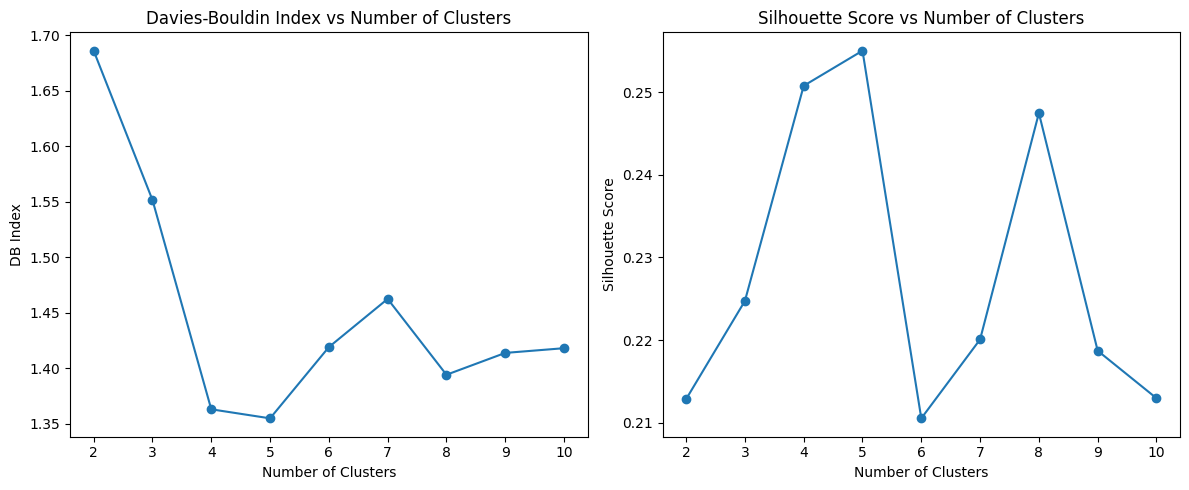

5

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt

feature_columns = [
    "TotalTransactions", "TotalQuantity", "TotalSpend",
    "AvgSpendPerTransaction", "SignupRecency",
    "Region_Europe", "Region_North America", "Region_South America"
]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_segmentation_df[feature_columns])

db_scores = []
silhouette_scores = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)

    db_index = davies_bouldin_score(scaled_features, cluster_labels)
    db_scores.append(db_index)


    sil_score = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(sil_score)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), db_scores, marker='o')
plt.title('Davies-Bouldin Index vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('DB Index')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# identifying optimal number of clusters based on lowest DB Index
optimal_clusters = db_scores.index(min(db_scores)) + 2
optimal_clusters


## At k=5 we get lowest DB score, so we will go with K=5, and the Silhouette score also suggest that we should go with k=5

In [73]:
# fitting kmeans with k=5
kmeans_optimal = KMeans(n_clusters=5, random_state=42)
customer_segmentation_df['Cluster'] = kmeans_optimal.fit_predict(scaled_features)


final_db_index = davies_bouldin_score(scaled_features, customer_segmentation_df['Cluster'])
final_silhouette_score = silhouette_score(scaled_features, customer_segmentation_df['Cluster'])

final_db_index, final_silhouette_score


(1.3547088760955934, 0.2549935635490153)

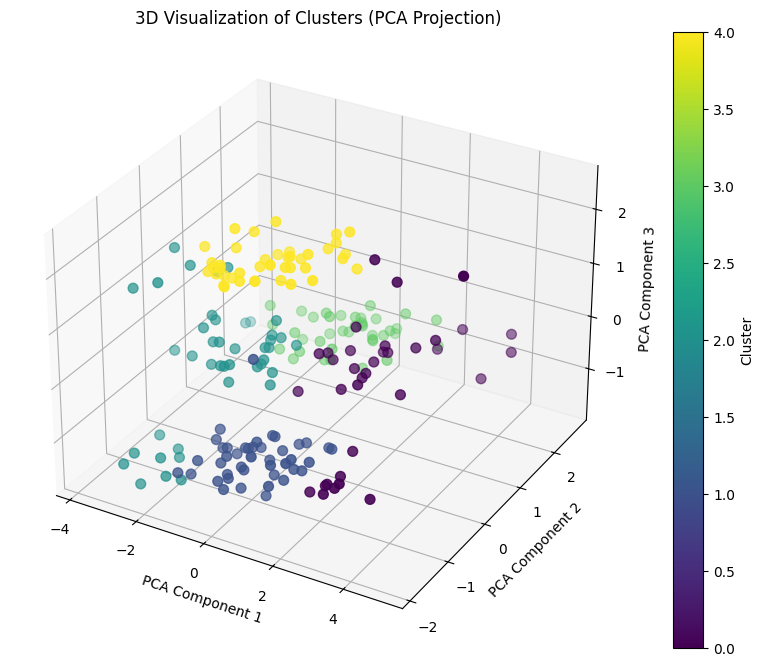

In [74]:
# 3d visualisation of clusters using PCA for Dimensionality Reduction
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')


scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=customer_segmentation_df['Cluster'],
    cmap='viridis',
    s=50
)

ax.set_title("3D Visualization of Clusters (PCA Projection)")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
fig.colorbar(scatter, label='Cluster')

plt.show()


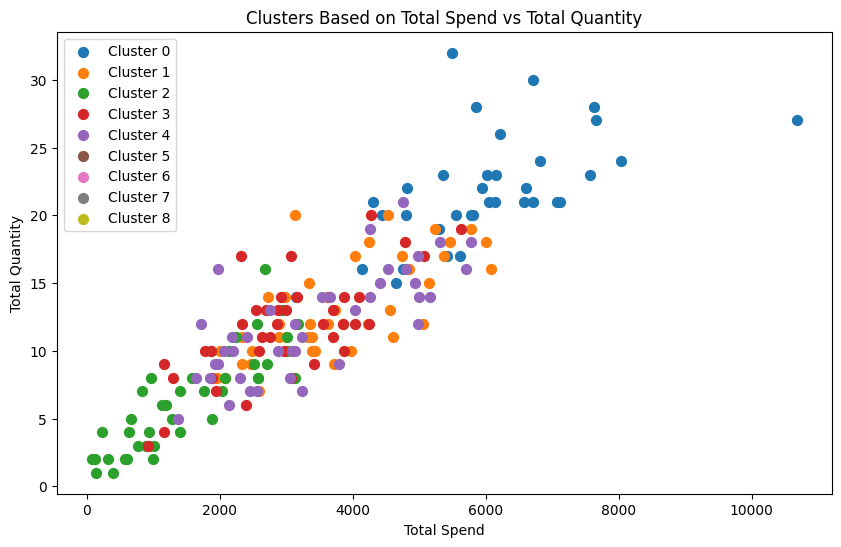

In [75]:
plt.figure(figsize=(10, 6))
for cluster in range(9):
    cluster_data = customer_segmentation_df[customer_segmentation_df['Cluster'] == cluster]
    plt.scatter(cluster_data['TotalSpend'], cluster_data['TotalQuantity'], label=f"Cluster {cluster}", s=50)

plt.title("Clusters Based on Total Spend vs Total Quantity")
plt.xlabel("Total Spend")
plt.ylabel("Total Quantity")
plt.legend()
plt.show()


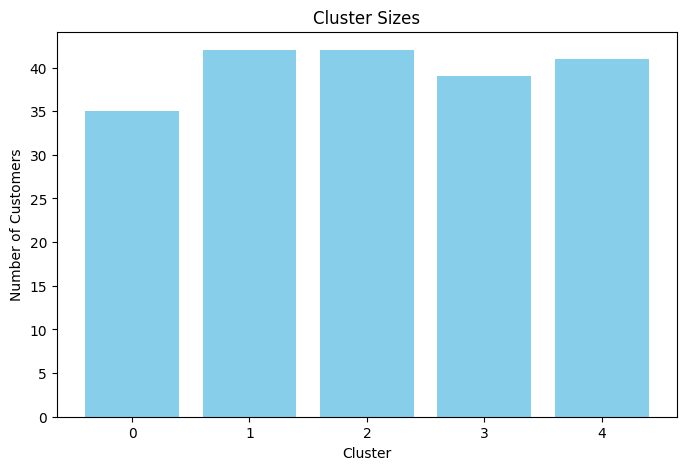

In [76]:
# 3. Bar plot showing size of each cluster
cluster_sizes = customer_segmentation_df['Cluster'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(cluster_sizes.index, cluster_sizes.values, color='skyblue')
plt.title("Cluster Sizes")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.xticks(cluster_sizes.index)
plt.show()
